In [18]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_regression

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target

# Displayong Data
print("First 3 Rows of Data")
print(df.head(3))

First 3 Rows of Data
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  


In [19]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


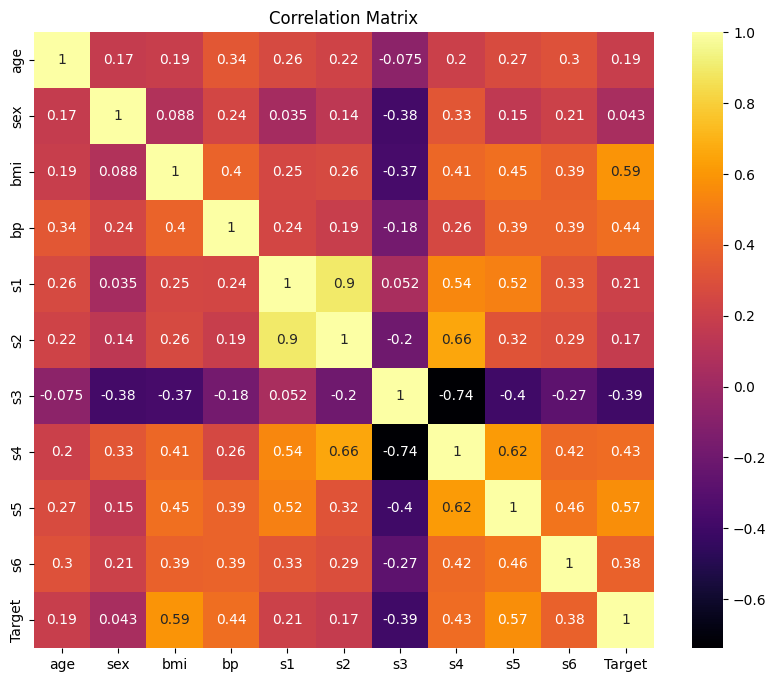

In [22]:
# Checking Correlation
## Calculating Correlation Matrix
correlation_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="inferno", annot=True)
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Select Feature with High Correlation to the Target
correlated_features = correlation_matrix["Target"].sort_values(ascending=False)
print("Features Most Correlated with the Target")
print(correlated_features)

Features Most Correlated with the Target
Target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: Target, dtype: float64


In [26]:
# Seperate Features and Target
X = df.drop(columns=["Target"])
y = df["Target"]

# Calculate the mututal information
mutual_info = mutual_info_regression(X, y)

# Create a DataFrame for better Visualization
mi_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mutual_info})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

print("Mutual Information Scores:")
print(mi_df)

Mutual Information Scores:
  Feature  Mutual Information
2     bmi            0.171397
8      s5            0.150477
9      s6            0.107746
7      s4            0.096919
6      s3            0.073549
3      bp            0.067245
4      s1            0.061221
1     sex            0.032489
5      s2            0.011134
0     age            0.000000


### Feature Selection Using a Tree Based Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a RandRandomForest Model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get Important Feature
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Features":X.columns, "Important Features":feature_importance })
importance_df = importance_df.sort_values(by="Important Features", ascending=False)

print(importance_df)

  Features  Important Features
2      bmi            0.121665
8       s5            0.119679
3       bp            0.117954
5       s2            0.112527
9       s6            0.112249
0      age            0.110986
4       s1            0.109398
6       s3            0.107793
7       s4            0.060983
1      sex            0.026766


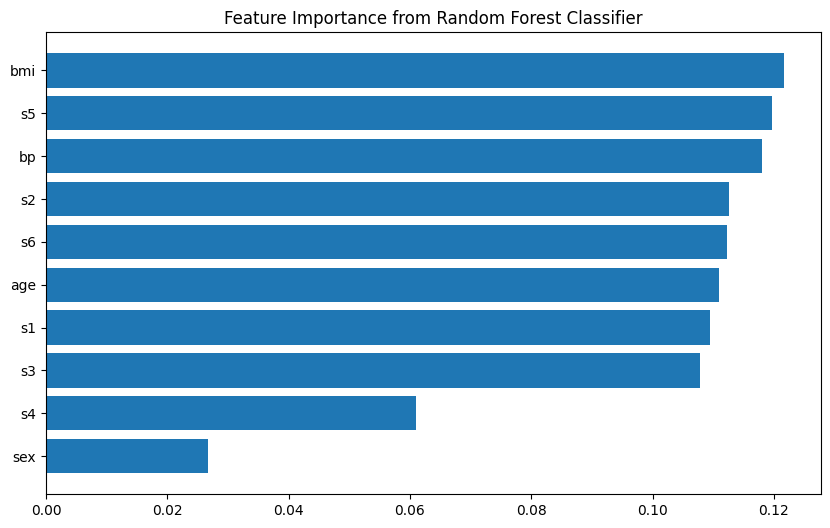

In [33]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Features"], importance_df["Important Features"])
plt.gca().invert_yaxis()
plt.title("Feature Importance from Random Forest Classifier")
plt.show()